In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import dlib

In [13]:
def imshow(cv2img):
    fig = plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(cv2img, cv2.COLOR_BGR2RGB))

## Here is a Christmas Hat

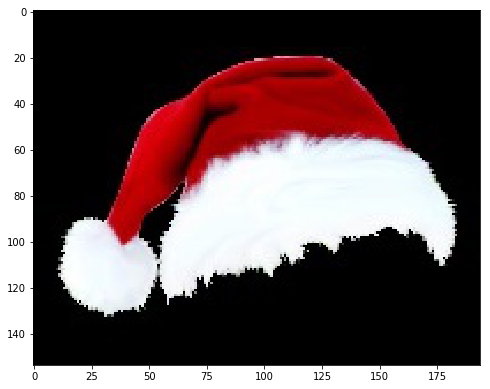

In [14]:
hat_img = cv2.imread('hat2.png', -1)
r, g, b, a = cv2.split(hat_img)
hat_img = cv2.imread('hat.jpg', -1)
imshow(hat_img)

## Here is Andrew:

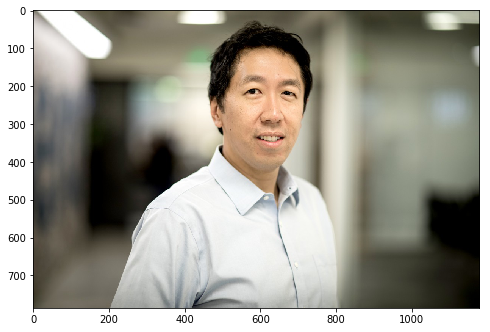

In [15]:
img = cv2.imread('andrew.jpg')
imshow(img)

## Facial recognization!

In [16]:
predictor_path = "shape_predictor_5_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)  
detector = dlib.get_frontal_face_detector()
dets = detector(img, 1)

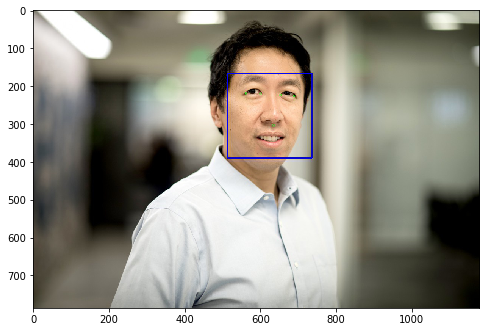

In [17]:
if len(dets)>0:  
    for d in dets:
        x,y,w,h = d.left(),d.top(), d.right()-d.left(), d.bottom()-d.top()
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2,8,0)
        shape = predictor(img, d)
        for point in shape.parts():
            cv2.circle(img,(point.x,point.y),3,color=(0,255,0))
        cv2.imwrite("wqq_face.jpg", img)
        img = cv2.imread('wqq_face.jpg')
        fig = plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
point1 = shape.part(0)
point2 = shape.part(2)
offset_x, offset_y = -250, 400
offset_x, offset_y = 0, 0
eyes_center = ((point1.x+point2.x)//2 + offset_x,(point1.y+point2.y)//2, offset_y)

factor = 1.5
resized_hat_h = int(round(hat_img.shape[0]*w/hat_img.shape[1]*factor))
resized_hat_w = int(round(hat_img.shape[1]*w/hat_img.shape[1]*factor))
if resized_hat_h > y:
    resized_hat_h = y-1
resized_hat = cv2.resize(hat_img,(resized_hat_w,resized_hat_h))

mask = cv2.resize(a,(resized_hat_w,resized_hat_h))
mask_inv =  cv2.bitwise_not(mask)
dh = 0
dw = 0
bg_roi = img[y+dh-resized_hat_h:y+dh,(eyes_center[0]-resized_hat_w//3*2):(eyes_center[0]+resized_hat_w//3)]

bg_roi = bg_roi.astype(float)
mask_inv = cv2.merge((mask_inv,mask_inv,mask_inv))
alpha = mask_inv.astype(float)/255

alpha = cv2.resize(alpha,(bg_roi.shape[1],bg_roi.shape[0]))
bg = cv2.multiply(alpha, bg_roi)
bg = bg.astype('uint8')

# Wowwwww! Merry Xmas

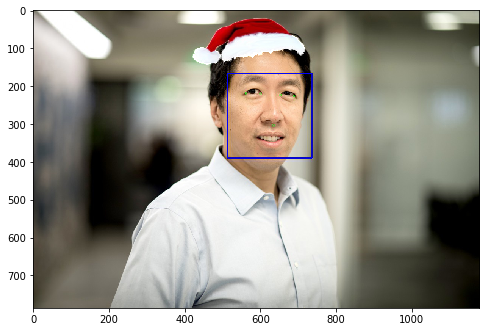

In [20]:
hat = cv2.resize(hat_img,(bg_roi.shape[1],bg_roi.shape[0]))
add_hat = cv2.add(bg,hat)
img[y+dh-resized_hat_h:y+dh,(eyes_center[0]-resized_hat_w//3*2):(eyes_center[0]+resized_hat_w//3)] = add_hat
imshow(img)